# A Comprehensive Guide on Learning Step-by-Step: Q-Learning and Deep Q-Learning

### Q-Learning

In [ ]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
plt.style.use('seaborn-v0_8-whitegrid')

In [ ]:
class StockGame():
    def __init__(self, price: float = 100, p: float = 0.01, r: float = 0.005):
        '''
        The enviroment class for the Stock Game.

        Parameters:
        price: starting price of the stock
        p: probability of change in trend
        r: % change at each step
        '''

        self.price_hist = [] # store price history
        self.R_hist = [] # store state, action and reward history
        self.price_hist.append(price)

        self.price = price
        self.p = p
        self.r = r

        self.n_states = 2 # up or down
        self.n_actions = 3 # buy or sell or do nothing

    def step(self, S: int, A: int):
        '''
        Executes a step in the environment

        Parameters:
        S: state
        A: action
        '''

        if S == 0: S = -1
        if A == 0: A = -1
        if np.random.uniform(0, 1) < self.p:
            S *= -1
        
        ret = self.r*S
        if A == 2: R = 0
        elif ret*A > 0: R = 1
        else: R = -1

        if S == -1: S = 0
        if A == -1: A = 0
        self.R_hist.append([S,A,R])
        self.price *= (1+ret)
        self.price_hist.append(self.price)

        return S, R

    def plot_price(self):
        plt.plot(self.price_hist)
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=12) 
        plt.xlabel('Step', fontsize=15)
        plt.ylabel('Price', fontsize=15)
        plt.show()

    def reset(self):

        self.price = self.price_hist[0]

        self.price_hist = []
        self.R_hist = []
        self.price_hist.append(self.price)

class Agent():

    def __init__(self, n_states: int, n_actions: int, alpha: float, gamma: float, epsilon: float):
        '''
        The Agent class for Q-learning.

        Parameters:
        n_states: number of states
        n_actions: number of actions
        alpha: learning rate
        gamma: discounting parameter
        epsilon: exploring probability
        '''
            
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.n_states = n_states
        self.n_actions = n_actions

        self.q_table = np.zeros((self.n_states, self.n_actions))

    def behavior_policy(self, S: int):
        
        if np.random.uniform(0, 1) < self.epsilon:
            A = np.random.choice(self.n_actions)
        else:
            A = np.argmax(self.q_table[S])
        
        return A

    def update(self, S: int, A: int, R: int, next_S: int):
        target = R + self.gamma * np.max(self.q_table[next_S])
        self.q_table[S, A] += self.alpha * (target - self.q_table[S, A])


def count_items(l: list):
    # count number of repeated elements in a list
    converted_list = [tuple(item) for item in l]
    counts = Counter(converted_list)
    for item, count in counts.items():
        if count > 1:
            print(f"{item}: {count}")

def get_mean(l: list):
    # get mean of each element position across all lists
    means = [sum(x) / len(x) for x in zip(*l)]
    print(f'mean results: {sum(means)/len(means)}/{n_steps}')
    plt.plot(means)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=12) 
    plt.xlabel('Step', fontsize=15)
    plt.ylabel('Mean Reward', fontsize=15)
    plt.show()

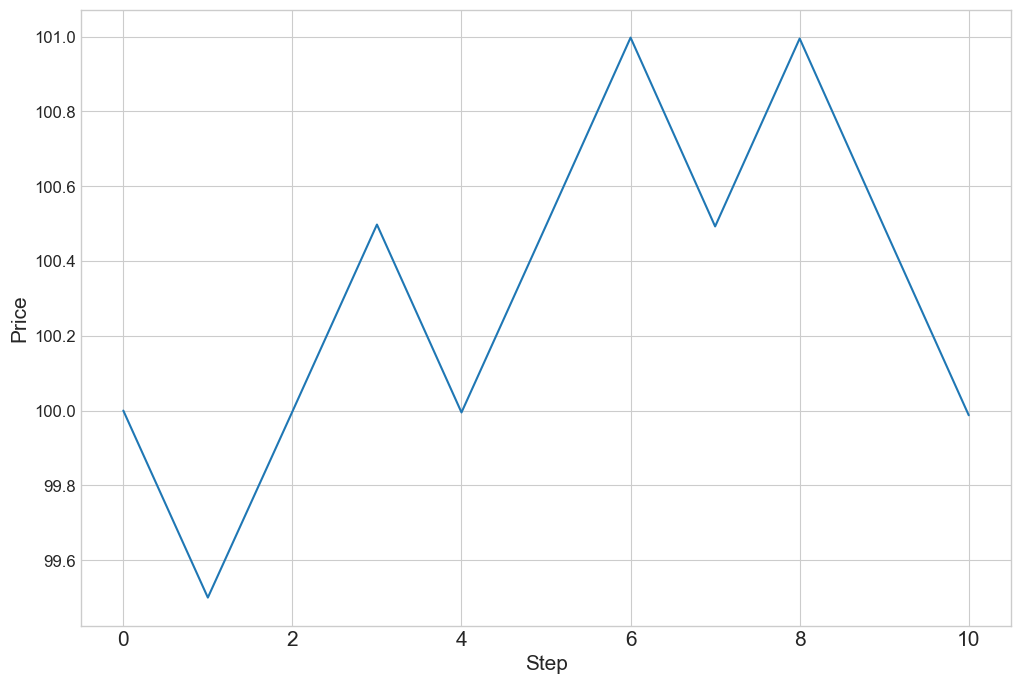

(2, 0): 22
(1, 0): 58
(1, 2): 19
mean results: 0.66831/10


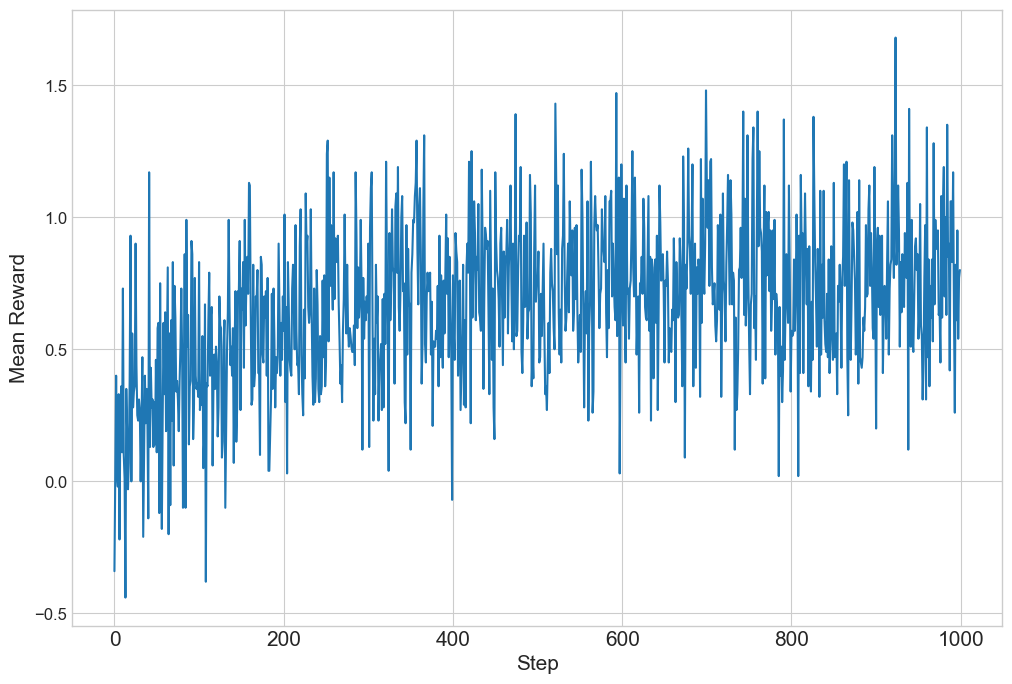

In [1]:
alpha = 0.01
gamma= 0.99
epsilon = 0.7
epsilon_decay = 0.995
n_episodes = 1000
p = 0.55

np.random.seed(seed=123) # to replicate results
game = StockGame(p = p)

n_simulations = 100
A_simulation = []
R_simulation = []


for _ in range(0, n_simulations):

    R_hist = []
    n_steps = 10 # number of steps per episode
    agent = Agent(game.n_states, game.n_actions, alpha, gamma, epsilon)

    for episode in range(0,n_episodes):
        game.reset()
        episode_R = 0
        S = np.random.choice(game.n_states)
        for step in range(0, n_steps):
            A = agent.behavior_policy(S)
            next_S, R = game.step(S, A)
            episode_R += R
            agent.update(S, A, R, next_S)
            S = next_S

        R_hist.append(episode_R)
        agent.epsilon *= epsilon_decay

    R_simulation.append(R_hist)
    A_simulation.append(np.argmax(agent.q_table, axis=1).tolist())

# last price, for visualization
game.plot_price()

count_items(A_simulation)
get_mean(R_simulation)
